In [67]:
%config Completer.use_jedi = False

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import homogeneity_score, completeness_score, classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In C:\Users\shado\anaconda3\envs\dl_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\shado\anaconda3\envs\dl_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\shado\anaconda3\envs\dl_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\shado\anaconda3\envs\dl_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\shado\anaconda3\envs\dl_env\lib\

## Reading the dataset

In [4]:
df = pd.read_excel('CTG.xls', sheet_name='Data', usecols="K:AE,AR,AT", skiprows=1)

In [5]:
df.head()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 23 columns):
LB          2126 non-null float64
AC.1        2126 non-null float64
FM.1        2127 non-null float64
UC.1        2127 non-null float64
DL.1        2128 non-null float64
DS.1        2128 non-null float64
DP.1        2128 non-null float64
ASTV        2127 non-null float64
MSTV        2127 non-null float64
ALTV        2127 non-null float64
MLTV        2127 non-null float64
Width       2126 non-null float64
Min         2126 non-null float64
Max         2126 non-null float64
Nmax        2126 non-null float64
Nzeros      2126 non-null float64
Mode        2126 non-null float64
Mean        2126 non-null float64
Median      2126 non-null float64
Variance    2126 non-null float64
Tendency    2126 non-null float64
CLASS       2126 non-null float64
NSP         2126 non-null float64
dtypes: float64(23)
memory usage: 382.7 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.000000,133.000000,140.000000,160.000000
AC.1,2126.0,0.003170,0.003860,0.0,0.000000,0.001630,0.005631,0.019284
FM.1,2127.0,0.009695,0.047764,0.0,0.000000,0.000000,0.002527,0.480634
UC.1,2127.0,0.004362,0.002949,0.0,0.001877,0.004484,0.006527,0.014925
DL.1,2128.0,0.001890,0.002976,0.0,0.000000,0.000000,0.003270,0.015385
DS.1,2128.0,0.000004,0.000069,0.0,0.000000,0.000000,0.000000,0.001353
DP.1,2128.0,0.000159,0.000590,0.0,0.000000,0.000000,0.000000,0.005348
ASTV,2127.0,47.008933,17.210648,12.0,32.000000,49.000000,61.000000,87.000000
MSTV,2127.0,1.335449,0.891543,0.2,0.700000,1.200000,1.700000,7.000000
ALTV,2127.0,9.884814,18.476534,0.0,0.000000,0.000000,11.000000,91.000000


## Missing Values

In [8]:
df.isna().sum()

LB          3
AC.1        3
FM.1        2
UC.1        2
DL.1        1
DS.1        1
DP.1        1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64

In [9]:
# Απο ότι φαίνεται οι τελευταίες 3 γραμμές του συνόλου δεδομένων είναι κάποια νούμερα στο φύλλο του Excel και δεν είναι 
# πραγματικές εγγραφές. Οπότε θα τις αφαιρέσουμε.
df[-3:]

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,0.480634,0.014925,0.015385,0.001353,0.005348,87.0,7.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df[:-3]

In [11]:
# Πλέον δεν υπάρχουν ελλιπείς τιμές στα δεδομένα μας
df.isna().sum()

LB          0
AC.1        0
FM.1        0
UC.1        0
DL.1        0
DS.1        0
DP.1        0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

## Exploratory Data Analysis

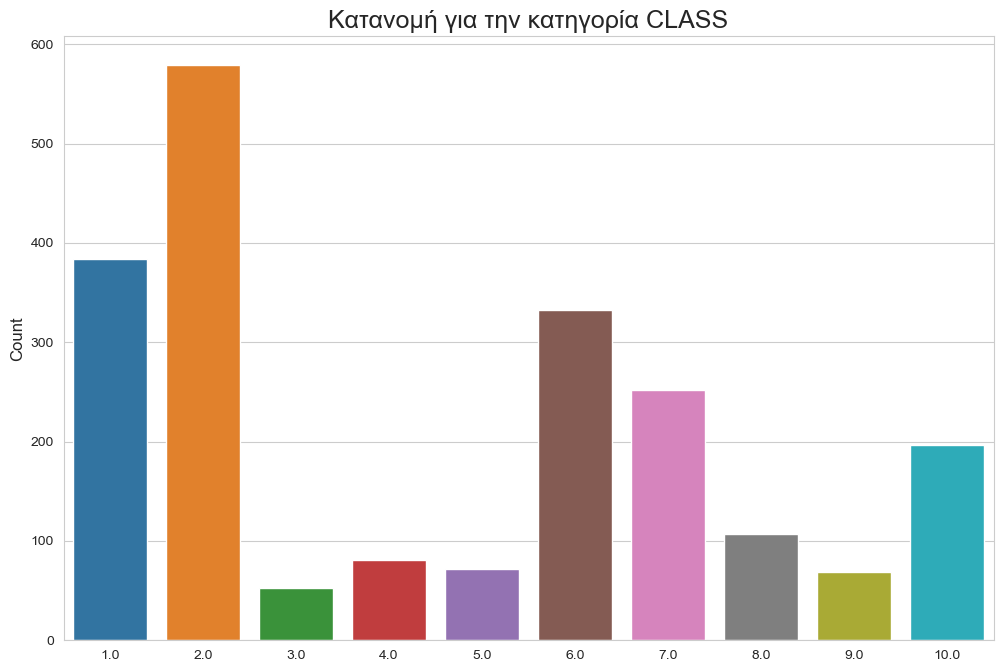

In [12]:
plt.figure(figsize=(12,8), dpi=100)
sns.set_style("whitegrid")
sns.barplot(df['CLASS'].value_counts().index, df['CLASS'].value_counts().values, palette='tab10')
plt.ylabel('Count', fontsize=12)
plt.title('Κατανομή για την κατηγορία CLASS', fontsize=18);

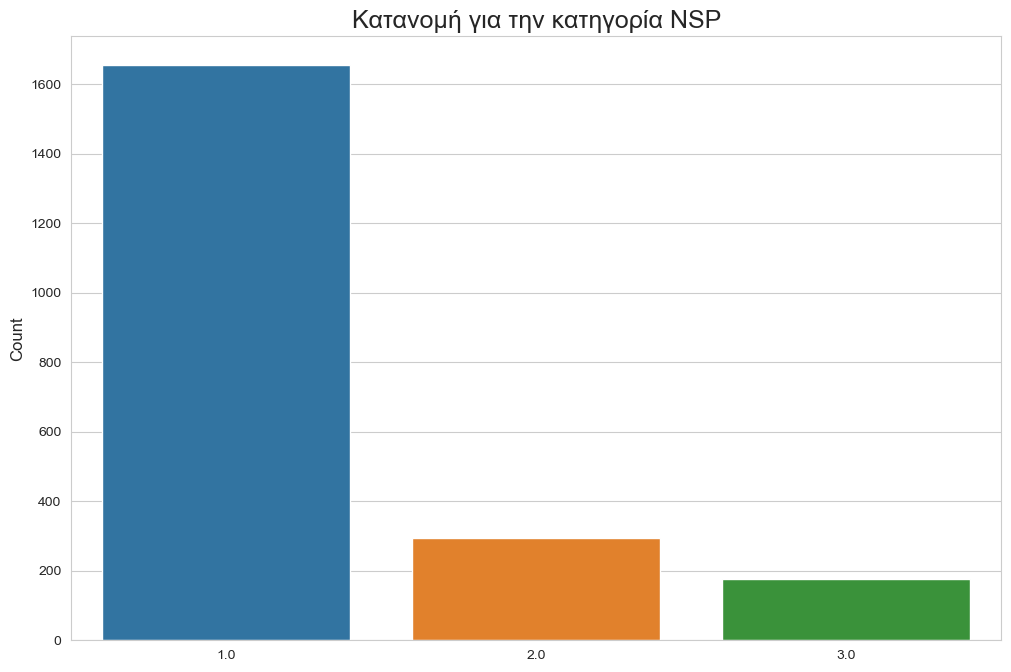

In [13]:
plt.figure(figsize=(12,8), dpi=100)
sns.set_style("whitegrid")
sns.barplot(df['NSP'].value_counts().index, df['NSP'].value_counts().values, palette='tab10', )
plt.ylabel('Count', fontsize=12)
plt.title('Κατανομή για την κατηγορία NSP', fontsize=18);

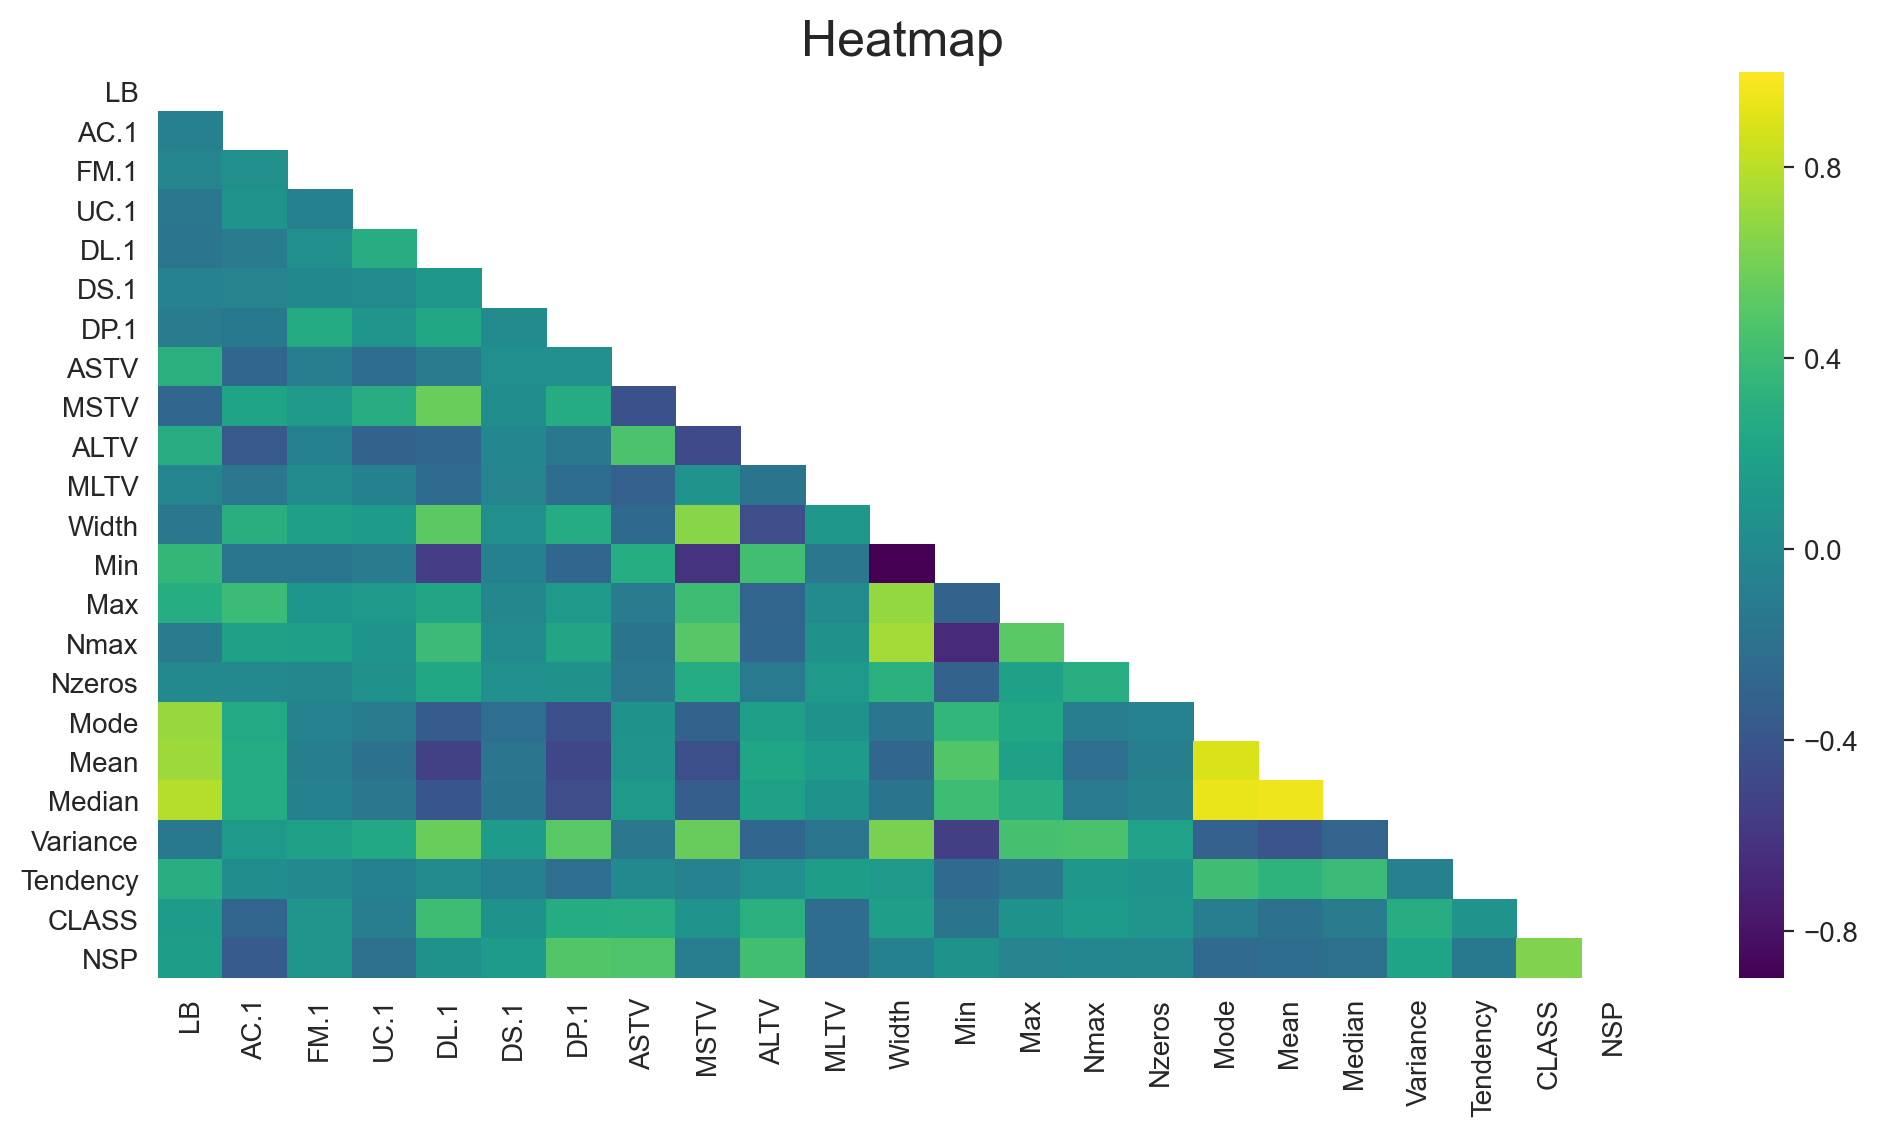

In [14]:
matrix = np.triu(df.corr())

plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(df.corr(), cmap='viridis', mask=matrix);
plt.title('Heatmap', fontsize=18);

<Figure size 2400x2000 with 0 Axes>

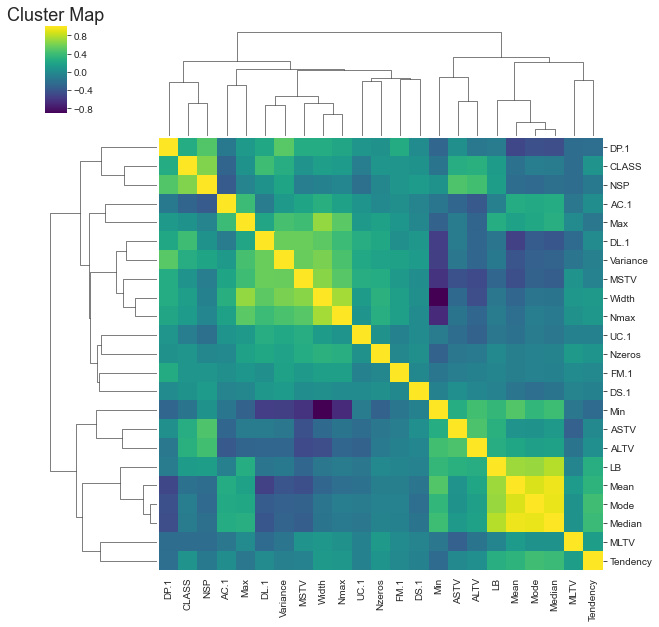

In [15]:
plt.figure(figsize=(12,10),dpi=200)
sns.clustermap(df.corr(), cmap='viridis')
plt.title('Cluster Map', fontsize=18);

## Feature Prep for the Clustering Algorithms

In [17]:
df['CLASS'] = df['CLASS'] - 1
df['CLASS'] = df['CLASS'].apply(int)

In [18]:
df['NSP'] = df['NSP'] - 1
df['NSP'] = df['NSP'].apply(int)

In [19]:
X = df.drop(['CLASS','NSP'], axis=1)

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X = scaler.fit_transform(X)

### Clustering Function - Evaluation Function

In [22]:
def clustering(class_model,nsp_model, data):
    class_cluster_labels = class_model.fit_predict(data)
    nsp_cluster_labels = nsp_model.fit_predict(data)
    return class_cluster_labels, nsp_cluster_labels

In [23]:
def cluster_scores(y_tru,y_pred):
    print("Homogeneity score: " + str(homogeneity_score(y_tru,y_pred)))
    print("Completeness score: " + str(completeness_score(y_tru,y_pred)))

### K-Means

In [24]:
kmeans_class_model = KMeans(n_clusters=10)
kmeans_nsp_model = KMeans(n_clusters=3)

In [25]:
kmeans_class_cluster_labels, kmeans_nsp_cluster_labels = clustering(kmeans_class_model, kmeans_nsp_model, scaled_X)

In [26]:
print("Scores of KMeans for the CLASS category ")
cluster_scores(df['CLASS'], kmeans_class_cluster_labels)

Scores of KMeans for the CLASS category 
Homogeneity score: 0.360679871551523
Completeness score: 0.3545236096068224


In [27]:
print("Scores of KMeans for the NSP category ")
cluster_scores(df['NSP'], kmeans_nsp_cluster_labels)

Scores of KMeans for the NSP category 
Homogeneity score: 0.24702809191273273
Completeness score: 0.1761545458687897


### DBSCAN

In [28]:
dbscan_class_model = DBSCAN(eps=3, min_samples=10)

In [29]:
dbscan_cluster_labels = dbscan_class_model.fit_predict(scaled_X)

In [30]:
print("Scores of DBSCAN for the NSP category")
cluster_scores(df['NSP'], dbscan_cluster_labels)

Scores of DBSCAN for the NSP category
Homogeneity score: 0.12106283505954561
Completeness score: 0.2092930400999789


### Hierarchical Clustering

In [31]:
hier_class_model = AgglomerativeClustering(n_clusters=10)
hier_nsp_model = AgglomerativeClustering(n_clusters=3)

In [32]:
hier_class_cluster_labels, hier_nsp_cluster_labels = clustering(hier_class_model, hier_nsp_model, scaled_X)

In [33]:
print("Scores of Hierarchical Clustering for the CLASS category ")
cluster_scores(df['CLASS'], hier_class_cluster_labels)

Scores of Hierarchical Clustering for the CLASS category 
Homogeneity score: 0.31134700252210956
Completeness score: 0.31238830542282964


In [34]:
print("Scores of Hierarchical Clustering for the NSP category ")
cluster_scores(df['NSP'], hier_nsp_cluster_labels)

Scores of Hierarchical Clustering for the NSP category 
Homogeneity score: 0.18912015761131848
Completeness score: 0.13332029517424548


## Classification with ANN

###### Spliting the dataset into features and targets

In [35]:
# Spliting the date in features and targets
X = df.drop(['CLASS','NSP'],axis=1).values
y = df['CLASS'].values

###### Performing a train test split (train 0.6,validation 0.1, test 0.3)

In [36]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.4, random_state=101)

In [37]:
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.75, random_state=101)

##### Normalizing the data

In [38]:
scaler = MinMaxScaler()
#Only fit to the X_train set so no prior information is leaked from the eval or test sets
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

##### One-Hot Encoding the category column

In [39]:
y_train = to_categorical(y_train, num_classes=10)
y_eval = to_categorical(y_eval, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

In [40]:
X_train.shape

(1275, 21)

###### Creating and training the neural network

In [41]:
model = Sequential()

# hidden layer
model.add(Dense(128, activation='relu', input_shape=(21,)))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(units=10,activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Adding an early stop callback to avoid overfiting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [43]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_eval, y_eval),
          verbose=1,
          batch_size=32,
          callbacks=[early_stop]
          )

Train on 1275 samples, validate on 212 samples
Epoch 1/600
1275/1275 [==============================] - 1s 512us/sample - loss: 2.1790 - accuracy: 0.2031 - val_loss: 1.9572 - val_accuracy: 0.2877
Epoch 2/600
1275/1275 [==============================] - 0s 58us/sample - loss: 1.8594 - accuracy: 0.3365 - val_loss: 1.6556 - val_accuracy: 0.4528
Epoch 3/600
1275/1275 [==============================] - 0s 60us/sample - loss: 1.5724 - accuracy: 0.4871 - val_loss: 1.4150 - val_accuracy: 0.5566
Epoch 4/600
1275/1275 [==============================] - 0s 58us/sample - loss: 1.3725 - accuracy: 0.5435 - val_loss: 1.2645 - val_accuracy: 0.6321
Epoch 5/600
1275/1275 [==============================] - 0s 60us/sample - loss: 1.2175 - accuracy: 0.5922 - val_loss: 1.1575 - val_accuracy: 0.6415
Epoch 6/600
1275/1275 [==============================] - 0s 64us/sample - loss: 1.1435 - accuracy: 0.6110 - val_loss: 1.0668 - val_accuracy: 0.6698
Epoch 7/600
1275/1275 [==============================] - 0s 57us

Epoch 56/600
1275/1275 [==============================] - 0s 55us/sample - loss: 0.5265 - accuracy: 0.8055 - val_loss: 0.5725 - val_accuracy: 0.7925
Epoch 57/600
1275/1275 [==============================] - 0s 47us/sample - loss: 0.5186 - accuracy: 0.8031 - val_loss: 0.5558 - val_accuracy: 0.7925
Epoch 58/600
1275/1275 [==============================] - 0s 47us/sample - loss: 0.5247 - accuracy: 0.7992 - val_loss: 0.5813 - val_accuracy: 0.7972
Epoch 59/600
1275/1275 [==============================] - 0s 53us/sample - loss: 0.5006 - accuracy: 0.8078 - val_loss: 0.5474 - val_accuracy: 0.7877
Epoch 60/600
1275/1275 [==============================] - 0s 50us/sample - loss: 0.4938 - accuracy: 0.8063 - val_loss: 0.5493 - val_accuracy: 0.7783
Epoch 61/600
1275/1275 [==============================] - 0s 55us/sample - loss: 0.5129 - accuracy: 0.8078 - val_loss: 0.5565 - val_accuracy: 0.8160
Epoch 62/600
1275/1275 [==============================] - 0s 55us/sample - loss: 0.4900 - accuracy: 0.8165

Epoch 111/600
1275/1275 [==============================] - 0s 55us/sample - loss: 0.4095 - accuracy: 0.8478 - val_loss: 0.5364 - val_accuracy: 0.8113
Epoch 112/600
1275/1275 [==============================] - 0s 47us/sample - loss: 0.3952 - accuracy: 0.8471 - val_loss: 0.5221 - val_accuracy: 0.8302
Epoch 113/600
1275/1275 [==============================] - 0s 55us/sample - loss: 0.4372 - accuracy: 0.8322 - val_loss: 0.5069 - val_accuracy: 0.8019
Epoch 114/600
1275/1275 [==============================] - 0s 47us/sample - loss: 0.4189 - accuracy: 0.8361 - val_loss: 0.5079 - val_accuracy: 0.8302
Epoch 115/600
1275/1275 [==============================] - 0s 55us/sample - loss: 0.3817 - accuracy: 0.8635 - val_loss: 0.5035 - val_accuracy: 0.8349
Epoch 116/600
1275/1275 [==============================] - 0s 47us/sample - loss: 0.4230 - accuracy: 0.8345 - val_loss: 0.4906 - val_accuracy: 0.8160
Epoch 117/600
1275/1275 [==============================] - 0s 47us/sample - loss: 0.4146 - accuracy:

1275/1275 [==============================] - 0s 53us/sample - loss: 0.3457 - accuracy: 0.8635 - val_loss: 0.4643 - val_accuracy: 0.8491
Epoch 166/600
1275/1275 [==============================] - 0s 48us/sample - loss: 0.3403 - accuracy: 0.8659 - val_loss: 0.4787 - val_accuracy: 0.8255
Epoch 167/600
1275/1275 [==============================] - 0s 50us/sample - loss: 0.3513 - accuracy: 0.8659 - val_loss: 0.4874 - val_accuracy: 0.8208
Epoch 168/600
1275/1275 [==============================] - 0s 50us/sample - loss: 0.3671 - accuracy: 0.8659 - val_loss: 0.4901 - val_accuracy: 0.8160
Epoch 169/600
1275/1275 [==============================] - 0s 55us/sample - loss: 0.3481 - accuracy: 0.8612 - val_loss: 0.5022 - val_accuracy: 0.8160
Epoch 170/600
1275/1275 [==============================] - 0s 47us/sample - loss: 0.3399 - accuracy: 0.8698 - val_loss: 0.4786 - val_accuracy: 0.8302
Epoch 171/600
1275/1275 [==============================] - 0s 55us/sample - loss: 0.3419 - accuracy: 0.8580 - val_

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 11,722
Trainable params: 11,722
Non-trainable params: 0
_________________________________________________________________


##### Evaluating the model

In [44]:
losses = pd.DataFrame(model.history.history)

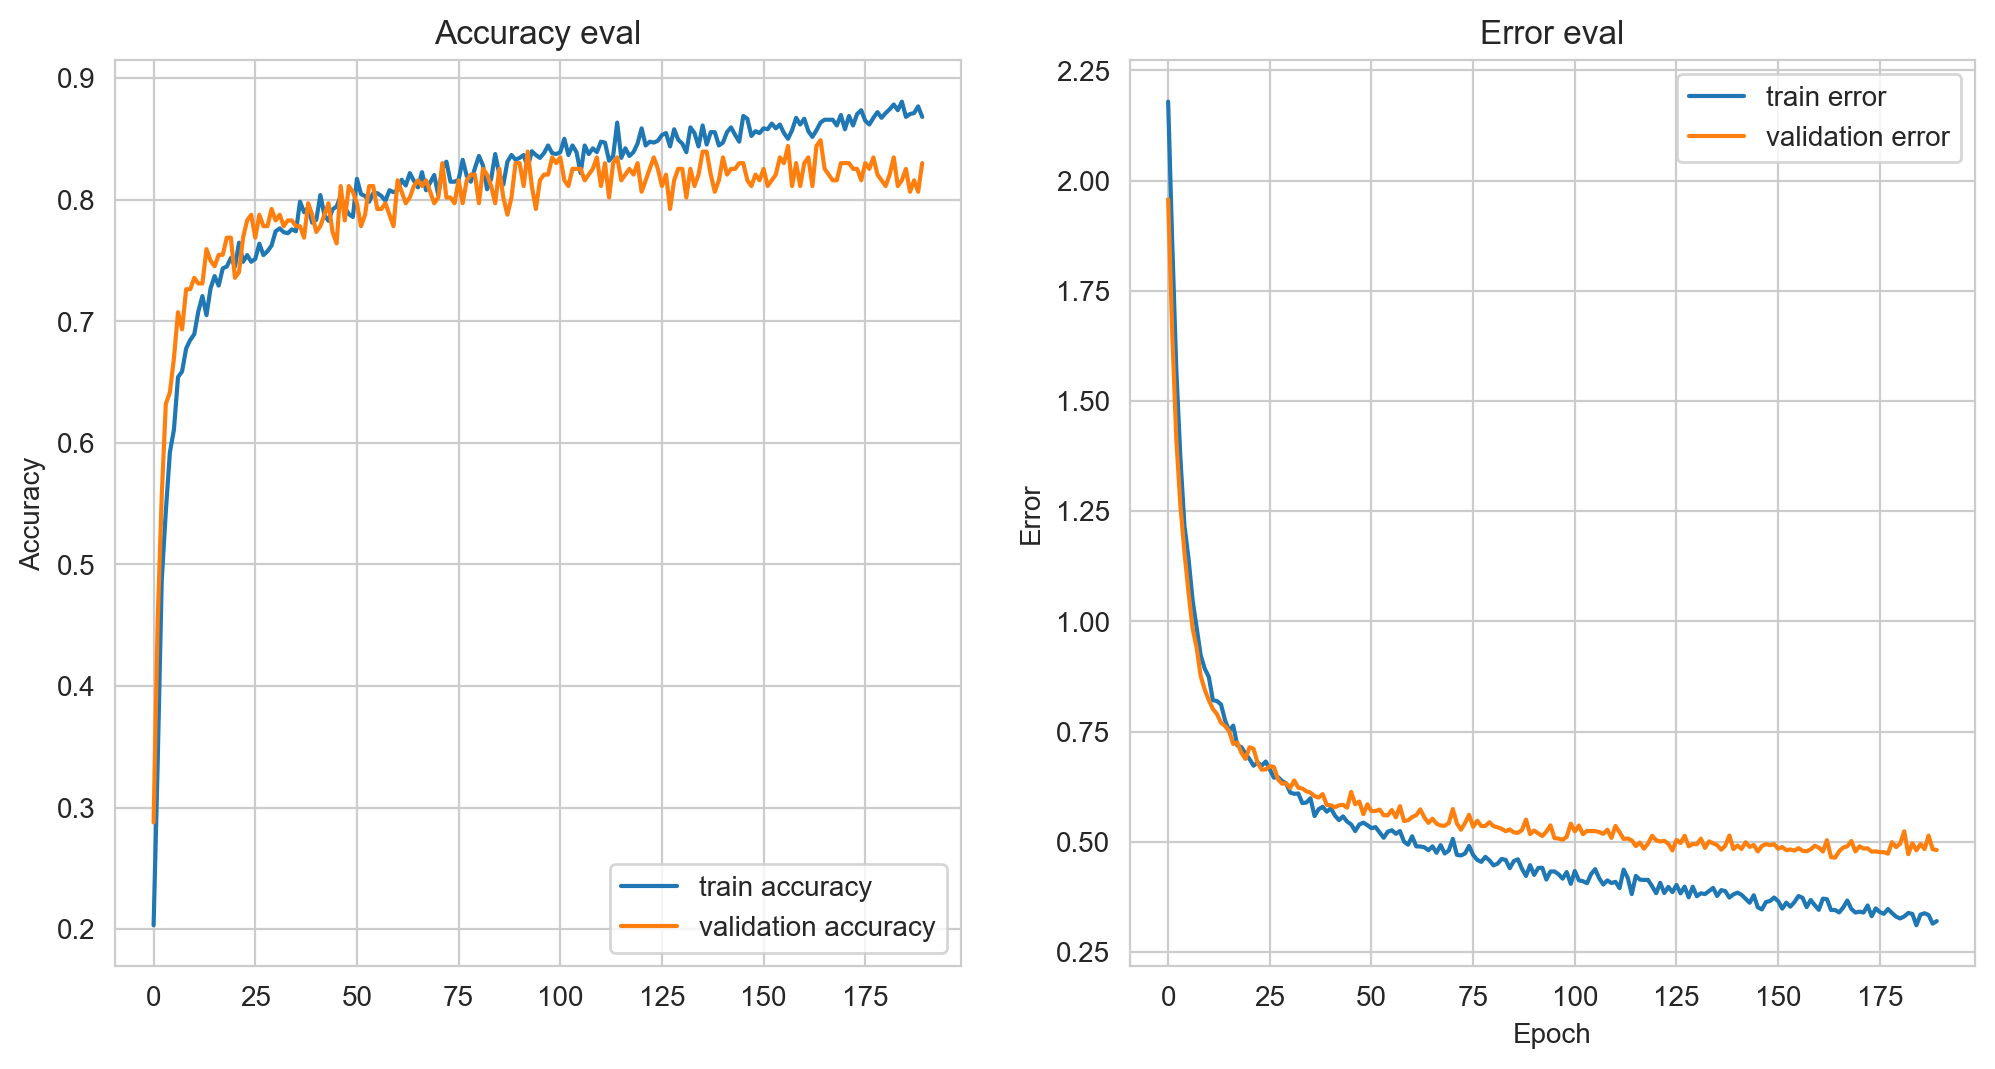

In [54]:
fig, axs = plt.subplots(ncols= 2, figsize=(12,6), dpi=200)

# create accuracy sublpot
axs[0].plot(losses["accuracy"], label="train accuracy")
axs[0].plot(losses["val_accuracy"], label="validation accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

# create error sublpot
axs[1].plot(losses["loss"], label="train error")
axs[1].plot(losses["val_loss"], label="validation error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.savefig('ann_eval.png');

In [47]:
# Creating the predictions of the test set
predict_x = model.predict(X_test) 
predictions = np.argmax(predict_x,axis=1)

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       112
           1       0.88      0.90      0.89       176
           2       1.00      0.21      0.35        19
           3       0.88      0.65      0.75        23
           4       0.64      0.62      0.63        26
           5       0.90      0.90      0.90       100
           6       0.93      0.88      0.90        75
           7       1.00      0.90      0.95        30
           8       1.00      0.56      0.71        27
           9       0.59      0.78      0.67        51

    accuracy                           0.81       639
   macro avg       0.85      0.72      0.75       639
weighted avg       0.83      0.81      0.81       639



In [49]:
confusion_matrix(y_test, predictions)

array([[ 88,   5,   0,   0,   4,   1,   2,   0,   0,  12],
       [ 10, 158,   0,   2,   4,   2,   0,   0,   0,   0],
       [ 14,   1,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,   0,  15,   0,   2,   0,   0,   0,   0],
       [  3,   1,   0,   0,  16,   0,   0,   0,   0,   6],
       [  2,   7,   0,   0,   1,  90,   0,   0,   0,   0],
       [  4,   0,   0,   0,   0,   5,  66,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   3,  27,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,  15,  10],
       [  9,   2,   0,   0,   0,   0,   0,   0,   0,  40]], dtype=int64)

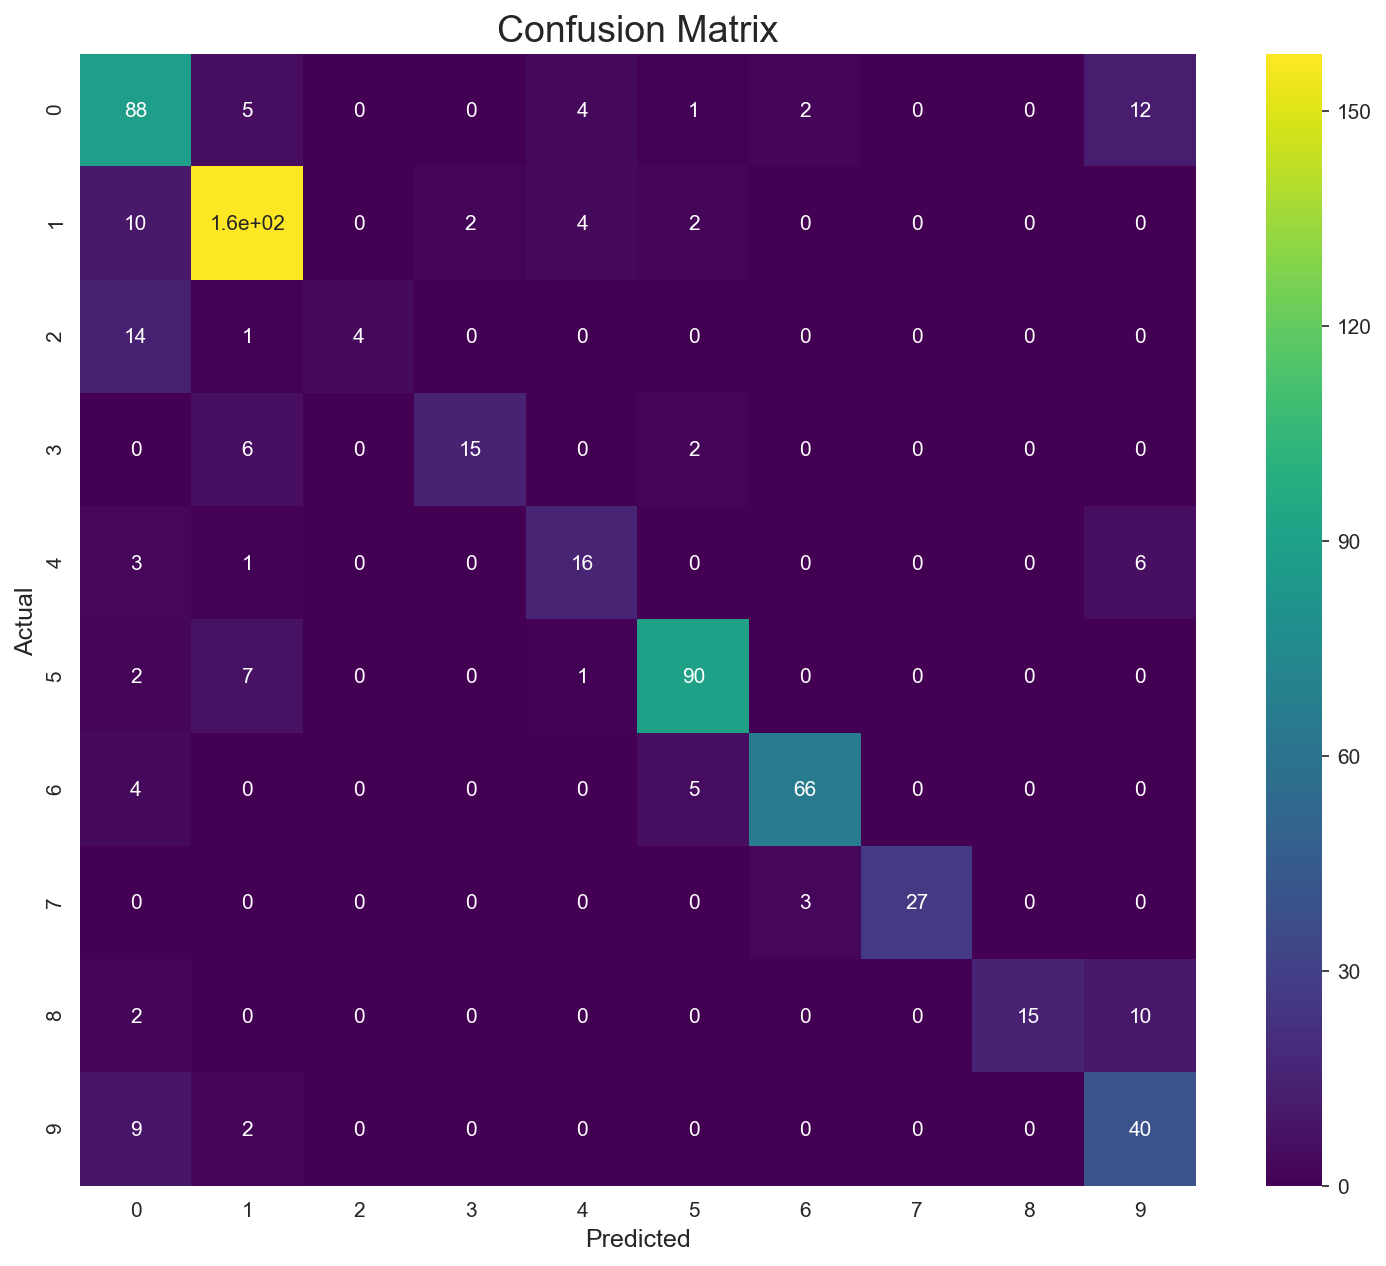

In [50]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(12,10), dpi=150)
sns.heatmap(conf_matrix, annot=True, cmap='viridis')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig('conf_matr.png');

In [94]:
model.save("ann_card.h5")
print("Saved the model to disk")

Saved the model to disk
